In [59]:
import json
import os
import random

from matplotlib import pyplot as plt
import numpy as np
from torchvision.io import VideoReader

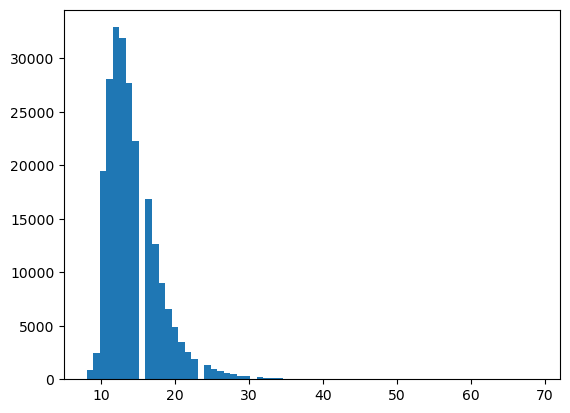

Mean:
[14.23141759 14.22067429 14.1939034  14.24962879 14.24181151 14.2024631
 14.21862171 14.23556643 14.19761551 14.23595947]
Min:
[8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
Max:
[65. 55. 52. 51. 51. 64. 69. 59. 53. 52.]


In [23]:
with open("dataset/vatex_train_captions.json") as file:
    lengths = []
    means = np.zeros(10)
    mins = np.ones(10) * np.inf
    maxs = np.zeros(10)
    
    data = json.load(file)
    for video in data:
        for i, caption in enumerate(video["enCap"]):
            length = len(caption.split(" "))
            lengths.append(length)
            means[i] += length
            mins[i] = min(mins[i], length)
            maxs[i] = max(maxs[i], length)
    
    plt.hist(lengths, bins=int(maxs.max()))
    plt.show()
    
    means /= len(data)
    print("Mean:")
    print(means)
    print("Min:")
    print(mins)
    print("Max:")
    print(maxs)

vVpsnAr40T0_000047_000057
['A man inserting a tube from a bucket down to an empty container.', 'A man demonstrates attaching a hose between a 5 gallon drum and a milk jug.', 'A man uses a plastic hose to siphon water from one container to the next.', 'A man explains and shows how to stick a tube into a gallon water jug.', "A man inserting a plastic tube from a 5 gallon bucket into a gallon milk jug and explains what he's doing.", 'A man demonstrates how to connect up a plastic bottle as an air trap on a home brewing kit.', 'A man is syphoning some liquid from a big white plastic container.', 'A man is demonstrating how to insert a tube into a bottle and how to hold it down.', 'A man is demonstrating a system that uses white buckets a hose and a gallon container', 'A man is seemingly making some kind of contraption out of 5 gallon buckets and a jug.']


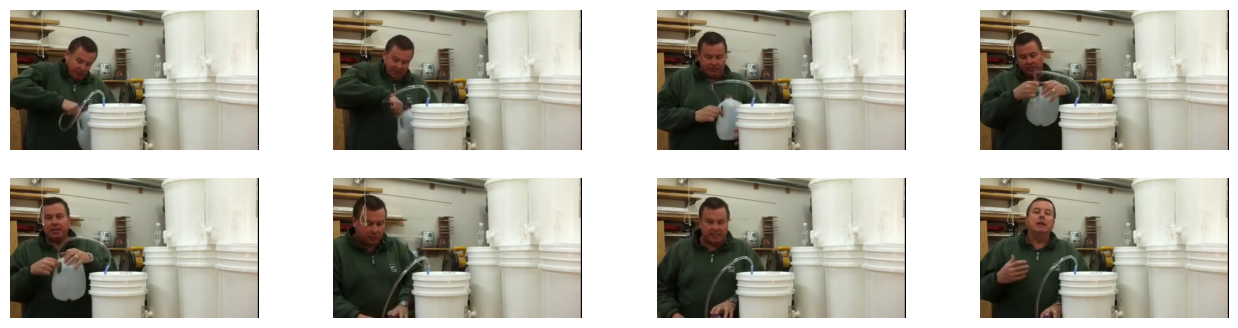

In [60]:
FRAMES_PER_VIDEO = 8
rows = 2
cols = FRAMES_PER_VIDEO // rows
fig = plt.figure(figsize=(16, 4))

with open("dataset/vatex_train_captions.json") as file:
    data = json.load(file)
    idx = random.randint(0, len(data) - 1)
    item = data[idx]
    
    video_id = item["videoID"]
    captions = item["enCap"]
    
    print(video_id)
    print(captions)
    
    videos_path = "dataset/videos"
    video_path = os.path.join(videos_path, "%s.mp4" % video_id)
    if not os.path.isfile(video_path):
        video_path = os.path.join(videos_path, "%s.webm" % video_id)
        
    reader = VideoReader(video_path)
    duration = reader.get_metadata()["video"]["duration"][0]
    step = duration / FRAMES_PER_VIDEO

    for i in range(FRAMES_PER_VIDEO):
        # fixed intervals
        timestamp = i * step
        # sample intervals
        #timestamp = random.uniform(i * step, (i + 1) * step)
        
        reader.seek(timestamp)
        frame = next(reader)["data"].numpy()
        
        frame = frame.swapaxes(0, 1)
        frame = frame.swapaxes(1, 2)
    
        fig.add_subplot(rows, cols, i + 1)
        plt.imshow(frame)
        plt.axis("off")